In [3]:
import pandas as pd
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
scrapUrl = "https://www.idealista.com/venta-viviendas/barcelona-barcelona/pagina-{}.htm?ordenado-por=fecha-publicacion-desc"

In [5]:
options = webdriver.ChromeOptions()
#options.add_argument('headless');
browser = webdriver.Chrome(executable_path=r"C:\Users\omarl\OneDrive\Escritorio\chromedriver.exe", options=options)
browser.get(scrapUrl.format(1))
time.sleep(2000)
page_source = browser.page_source
browser.quit()
soup = BeautifulSoup(page_source)

KeyboardInterrupt: 

In [ ]:
info = []
habs = []
m2 = []
floor = []
price = []

for row in soup.select(".item-info-container"):
    i = 0
    try:
        info.append(row.select_one(".item-link").text)
        habs.append(row.select(".item-detail")[0].text)
        m2.append(row.select(".item-detail")[1].text)
        floor.append(row.select(".item-detail")[2].text)
        price.append(row.select(".item-price")[0].text)
    except:
        floor.append("No info")
print(price)

In [6]:
city = []
neigh = []
for elem in info:
    city.append(elem.split(",")[-1].strip())
    neigh.append(elem.split(",")[-2].strip())

## Let's Parse, baby

In [3]:
scrapUrl = "https://www.idealista.com/venta-viviendas/barcelona-barcelona/pagina-{}.htm"

def parseIdealista(n = 5):
    info = []
    habs = []
    m2 = []
    floor = []
    price = []
    for i in range(1, n + 1):
        print("Parsing page {}...".format(i))
        options = webdriver.ChromeOptions()
        #options.add_argument('headless');
        #options.add_argument('--profile-directory=Profile 1')
        #options.add_argument('--no-sandbox')
        #options.add_argument("--user-data-dir=C:/Users/omarl/AppData/Local/Google/Chrome/User Data/")
        #options.add_argument("--remote-debugging-port=45447")
        browser = webdriver.Chrome(executable_path=r"C:\Users\omarl\OneDrive\Escritorio\chromedriver.exe", options=options)
        browser.get(scrapUrl.format(i))
        time.sleep(10)
        page_source = browser.page_source
        browser.quit()
        soup = BeautifulSoup(page_source)
        for row in soup.select(".item-info-container"):
            try:
                info.append(row.select_one(".item-link").text)
                habs.append(row.select(".item-detail")[0].text)
                m2.append(row.select(".item-detail")[1].text)
                floor.append(row.select(".item-detail")[2].text)
            except:
                floor.append("No info")
            try:
                price.append(row.select(".item-price")[0].text)
            except:
                price.append("No info")
                
            
    data = {
        "info": info,
        "habs": habs,
        "m2" : m2,
        "floor" : floor,
        "price" : price
    }
    return data


In [4]:
data = parseIdealista(n = 60)

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Parsing page 6...
Parsing page 7...
Parsing page 8...
Parsing page 9...
Parsing page 10...
Parsing page 11...
Parsing page 12...
Parsing page 13...
Parsing page 14...
Parsing page 15...
Parsing page 16...
Parsing page 17...
Parsing page 18...
Parsing page 19...
Parsing page 20...
Parsing page 21...
Parsing page 22...
Parsing page 23...
Parsing page 24...
Parsing page 25...
Parsing page 26...
Parsing page 27...
Parsing page 28...
Parsing page 29...
Parsing page 30...
Parsing page 31...
Parsing page 32...
Parsing page 33...
Parsing page 34...
Parsing page 35...
Parsing page 36...
Parsing page 37...
Parsing page 38...
Parsing page 39...
Parsing page 40...
Parsing page 41...
Parsing page 42...
Parsing page 43...
Parsing page 44...
Parsing page 45...
Parsing page 46...
Parsing page 47...
Parsing page 48...
Parsing page 49...
Parsing page 50...
Parsing page 51...
Parsing page 52...
Parsing page 53...
Pa

In [5]:
df = pd.DataFrame(data = data)

In [6]:
df["habs"] = df["habs"].str.extract(r"(\d+)")
df["habs"] = pd.to_numeric(df["habs"])
df["m2"] = df["m2"].str.extract(r"(\d+)")
df["m2"] = pd.to_numeric(df["m2"])

In [7]:
df["elevator"] = df["floor"].str.match(r".*con ascensor.*")
df["exterior"] = df["floor"].str.match(r".*planta exterior.*")
df["floor"] = df["floor"].str.extract(r"(\d+)")
df["floor"] = pd.to_numeric(df["floor"])
df["neigh"] = df["info"].str.split(',').str[-2]
df["neigh"] = df["neigh"].str.replace(r"[A-zÀ-ú]+ en ", "")
df["neigh"] = df["neigh"].str.replace(r"^\s*", "")
df["neigh"] = df["neigh"].str.replace(r"[A-zÀ-ú]+ en ", "")
df["neigh"] = df["neigh"].str.replace(r"Casa o chalet ", "")
df["neigh"] = df["neigh"].str.replace(r"Chalet " , "")
df["price"] = df["price"].str.replace(r"[€\.]", "")
df["price"] = pd.to_numeric(df["price"])

In [8]:
df["type"] = df["info"].str.split(" ").str[0]

In [9]:
top10Index = df.groupby("neigh")["price"].mean().sort_values(ascending = False).head(10).index
top10obs = df.groupby("neigh")["neigh"].count().sort_values(ascending = False).head(10)

<AxesSubplot:xlabel='price', ylabel='neigh'>

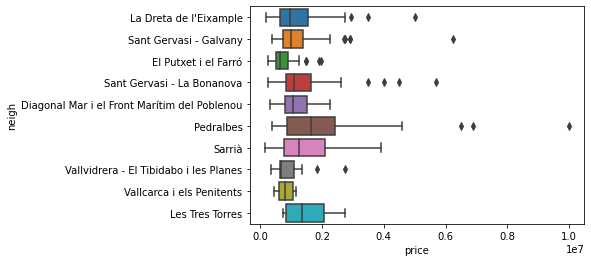

In [11]:
sns.boxplot(y="neigh", x="price", data=df[df["neigh"].isin(top10Index)])

In [1]:
top_bot = df.groupby("neigh")["price"].mean().sort_values(ascending = False).head(10)
top_bot = top_bot.append(df.groupby("neigh")["price"].mean().sort_values(ascending = False).tail(10))
top_bot = top_bot.to_frame().reset_index()
top_bot["price"] = top_bot["price"]

NameError: name 'df' is not defined

In [2]:
g = sns.catplot(x="price", y="neigh", kind="bar", data=top_bot).set(title = "Mean of the top and bottom prices (euros) by neighbour")

NameError: name 'sns' is not defined

In [14]:
df.groupby(["neigh", "type"]).count()["info"].to_frame().rename(columns = {"info" : "n"}).reset_index()

,neigh,type,n
0,Can Baró,Chalet,1
1,Can Baró,Piso,1
2,Can Baró,Ático,1
3,Canyelles,Piso,1
4,Casa La Font d'En Fargues,Casa,1
...,...,...,...
140,Vila de Gràcia,Chalet,1
141,Vila de Gràcia,Piso,27
142,Vila de Gràcia,Ático,2
143,Vilapicina i la Torre Llobeta,Piso,8


In [17]:
df.to_csv(r"C:\Users\omarl\OneDrive\Escritorio\idealistaBCN.csv")

In [6]:
df = pd.read_csv(r"C:\Users\omarl\OneDrive\Escritorio\idealistaBCN.csv")

In [13]:
sns.plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.ticklabel_format(style='plain', axis='y')
g = sns.catplot(x="price", y="neigh", kind="bar", data=df)


AttributeError: module 'seaborn' has no attribute 'plt'